In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
colnames = ['area', 'rooms', 'price']
df = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/ex1data2.txt", names = colnames)
df

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [ ]:
df.shape

(47, 3)

In [ ]:
df.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
area  = df.iloc[0:df.shape[0],0:1]
rooms = df.iloc[0:df.shape[0],1:2]
price = df.iloc[0:df.shape[0],2:3]

In [ ]:
def feature_normalization(x):
  mean = np.mean(x, axis=0)
  std = np.std(x, axis=0)
  return (x - mean)/std, mean, std

In [ ]:
df_norm = df.values
m = df_norm.shape[0]
x = df_norm[:, 0:2].reshape(m,2)
x_norm, mean, std = feature_normalization(x)
y_norm = df_norm[:, 2:3].reshape(m,1)
x_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [ ]:
def hypothesis(theta_array,x1,x2):
  return theta_array[0] + theta_array[1] * x1 + theta_array[2] * x2

In [ ]:
def cost_function(theta_array, x1, x2, y, m):
  return sum([((hypothesis(theta_array,x1[i],x2[i]) - y[i])**2) for i in range(m)])/(2*m)
  # errors = 0
  # for i in range(m):
  #  errors += (hypothesis(theta_array,x1[i],x2[i]) - y[i]**2)
  # return errors/(2*m)

In [ ]:
def gradient_descent(theta_array, x1, x2, y, m, alpha):
  temp = 0
  sum_0 = 0
  sum_1 = 0
  sum_2 = 0
  for i in range(m):
    temp = (hypothesis(theta_array,x1[i],x2[i]) - y[i])
    sum_0 += temp
    sum_1 += temp * x1[i]
    sum_2 += temp * x2[i]
  return [theta_array[0] - (alpha/m) * sum_0, theta_array[1] - (alpha/m) * sum_1, theta_array[2] - (alpha/m) * sum_2] #[new_theta0, new_theta1, new_theta2]

In [ ]:
def training(x1, x2, y, alpha, iters):
  theta_array = [0,0,0]
  m = x1.size
  cost = []
  for i in range(iters):
    theta_array = gradient_descent(theta_array, x1, x2, y, m, alpha)
    cost.append(cost_function(theta_array, x1, x2, y, m))
  return cost,theta_array

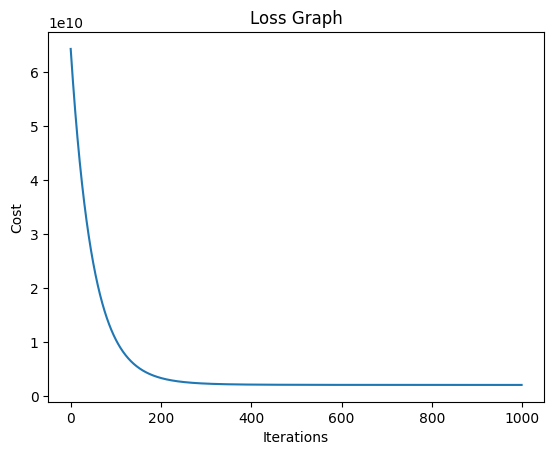

[array([340397.96353532]), array([108742.65627238]), array([-5873.22993383])]


In [ ]:
alpha = 0.1
iters = 1000
cost_values,theta_array = training(x_norm[:,0:1],x_norm[:,1:2],y_norm,alpha,iters)
x_axis = np.arange(0, len(cost_values), step=1)
plt.plot(x_axis, cost_values)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss Graph')
plt.show()
print(theta_array)